# <u><b>W207 Final Group Project Baseline: Facial Emotion Recognition</b></u>

##### Group Members: Jeff Zheng, Frank Bruni, Ash Tan, Daphne Yang

## <b>Background</b>
With the COVID19 pandemic causing an abrupt shift to from in-person meetings to online alternatives for both work and school, people all over the world have see a major disruption to "normal" life. Traditionally in-person meetings were now being held online through platforms like Zoom, Google Hangouts, and Microsoft Teams. Although it is widely agreed that the migration to exclusively online platforms has been a "disruption," there is varying levels to which this change has impacted individuals. Markedly, there are anecdotal and well documented incidences of disproportionate burdens onto individuals with autism as a result of this shift. Notably, Microsoft published a paper on ["The Needs of Autistic Adults in Video Calling"](https://www.microsoft.com/en-us/research/publication/managing-stress-the-needs-of-autistic-adults-in-video-calling/) which stressed the importance of understanding the differential needs of varying communities especially the unique challenges presented to individuals with autism. Individuals with autism often struggle with social emotional agnosia which is the inability to see and/or perceive body language, facial expression and tone of voice. This mean that the person is only “seeing” factual information, according to [Open Doors Therapy](https://opendoorstherapy.com/neurodiversity-emotional-blindness-autism-therapy/). There is evidence that studying body language helps some individuals better understand their audiences' emotions; however, the shift towards virtual meetings with less ability for these individuals to "read" body language have presented additional stressors with few tools to improve accessibility on these virtual platforms.

## <b>Problem Statement</b>
The shift to a virtual meeting world has present unique challenges to those individuals with Autism and struggle from social emotional agnosia. 

## <b>Hypothesis</b>
We hypothesize that we can use data science, specifically machine learning techniques, to build a facial emotion classifier that can help to detect emotions into 7 different broad categories (Angry, Disgust, Fear, Happy, Sad, Surprise, and Neutral) in an effort to increase accessibility for individuals with autism in the age of virtual meetings.


# <b><u>Exploratory Data Analysis</u></b>

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

data = pd.read_csv('fer2013.csv')

# it takes some time for the csv to be fully read into colab, so give it a few seconds before running 
# (data shape will change as more rows get read)
df = data
# for demo, using 1000 rows as data
print(df.shape)
df.head()


(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [2]:
print(df.shape)


(35887, 3)


In [3]:
# adding picture id labels
# reformatting pixel column
df = data

print(df.shape)

df["id"] = df.index + 1


def append_ext(fn):
    return str(fn)+".png"

df["id"]=df["id"].apply(append_ext)
print(df.head())
# df['pixels'] = df.pixels.apply(lambda x: x[0:-1].split(' '))
df['pixels'] = df["pixels"].str.split(" ").apply(lambda x: [int(float(i)) for i in x])
data=df
print(data.shape)
data.head()


(35887, 3)
   emotion                                             pixels     Usage     id
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training  1.png
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training  2.png
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training  3.png
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training  4.png
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training  5.png
(35887, 4)


,emotion,pixels,Usage,id
0,0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...",Training,1.png
1,0,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ...",Training,2.png
2,2,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ...",Training,3.png
3,4,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2...",Training,4.png
4,6,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...",Training,5.png


In [4]:
# splitting data into training/dev/test

# df['Usage'].iloc[0:6000] = 'Training'
# df['Usage'].iloc[6000:8000] = 'PrivateTest'
# df['Usage'].iloc[8000:10000] = 'PublicTest'

def emotion_name(x):
    emotion_list = ['Angry', 'Disgust', 'Fear', 
                  'Happy', 'Sad', 'Surprise', 'Neutral']
    return emotion_list[x]
  
df['emotion_name'] = df['emotion'].apply(emotion_name)

print(df['Usage'].unique())
print(df[df['Usage'] == 'Training'].shape)
print(df[df['Usage'] == 'PrivateTest'].shape)
print(df[df['Usage'] == 'PublicTest'].shape)
data = df
data

['Training' 'PublicTest' 'PrivateTest']
(28709, 5)
(3589, 5)
(3589, 5)


,emotion,pixels,Usage,id,emotion_name
0,0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...",Training,1.png,Angry
1,0,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ...",Training,2.png,Angry
2,2,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ...",Training,3.png,Fear
3,4,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2...",Training,4.png,Sad
4,6,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...",Training,5.png,Neutral
...,...,...,...,...,...
35882,6,"[50, 36, 17, 22, 23, 29, 33, 39, 34, 37, 37, 3...",PrivateTest,35883.png,Neutral
35883,3,"[178, 174, 172, 173, 181, 188, 191, 194, 196, ...",PrivateTest,35884.png,Happy
35884,0,"[17, 17, 16, 23, 28, 22, 19, 17, 25, 26, 20, 2...",PrivateTest,35885.png,Angry
35885,3,"[30, 28, 28, 29, 31, 30, 42, 68, 79, 81, 77, 6...",PrivateTest,35886.png,Happy


In [5]:
# Create directories
dataset_names = ['train','dev','test']

for i in dataset_names:
    dirName = i
    try:
        # Create target Directory
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ") 
    except FileExistsError:
        print("Directory " , dirName ,  " already exists")



Directory  train  already exists
Directory  dev  already exists
Directory  test  already exists


In [6]:
df = data
# generate png images from pixel values and write them to appropriate directory
plt.ioff()

for i in range(df.shape[0]):
    fig = plt.figure(frameon=False)
    # print(i)
    plt.imshow(np.reshape(df['pixels'][i],(48,48)),cmap='Greys_r')
    plt.axis('off')
    dataset_class = df['Usage'][i]
    if dataset_class == 'Training':
        fig.savefig('./train/' + df['id'][i])
    if dataset_class == 'PrivateTest':
        fig.savefig('./dev/' + df['id'][i])
    if dataset_class == 'PublicTest':
        fig.savefig('./test/' + df['id'][i])
    plt.close(fig)


# plt.imshow(np.reshape(df['pixels'].iloc[0:0],(48,48)),cmap='Greys_r')
print('Writing finished - you may now continue.')

In [7]:
train = data[data['Usage'] == 'Training']['pixels']
train_labels = data[data['Usage'] == 'Training']['emotion']

dev = data[data['Usage'] == 'PrivateTest']['pixels']
dev_labels = data[data['Usage'] == 'PrivateTest']['emotion']

test = data[data['Usage'] == 'PublicTest']['pixels']
test_labels = data[data['Usage'] == 'PublicTest']['emotion']

In [8]:
# checking data dimensions

print(data['emotion'].unique())

print(df.shape)
print(train.shape)
print(dev.shape)
print(test.shape)
data['Usage'].unique()

[0 2 4 6 3 5 1]
(35887, 5)
(28709,)
(3589,)
(3589,)


array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

## Optimized model

This is the best model we were able to finish training. It balances learning rate against overfitting to reach a test accuracy of 0.58.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np


# https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c
# https://www.tensorflow.org/tutorials/images/classification 

df['emotion'] = df['emotion'].astype(str)


datagen=ImageDataGenerator(rescale=1./255.)

train_generator=datagen.flow_from_dataframe(
dataframe=df[df['Usage']=='Training'],
directory="./train/",
x_col="id",
y_col="emotion",
batch_size=48*2,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(48,48))

dev_generator=datagen.flow_from_dataframe(
dataframe=df[df['Usage']=='PrivateTest'],
directory="./dev/",
x_col="id",
y_col="emotion",
batch_size=48*2,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(48,48))

test_generator=datagen.flow_from_dataframe(
dataframe=df[df['Usage']=='PublicTest'],
directory="./test/",
x_col="id",
y_col="emotion",
batch_size=48*2,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(48,48))


Using TensorFlow backend.


Found 28709 validated image filenames belonging to 7 classes.
Found 3589 validated image filenames belonging to 7 classes.
Found 3589 validated image filenames belonging to 7 classes.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 48)        1344      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 96)        41568     
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 96)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 96)        3

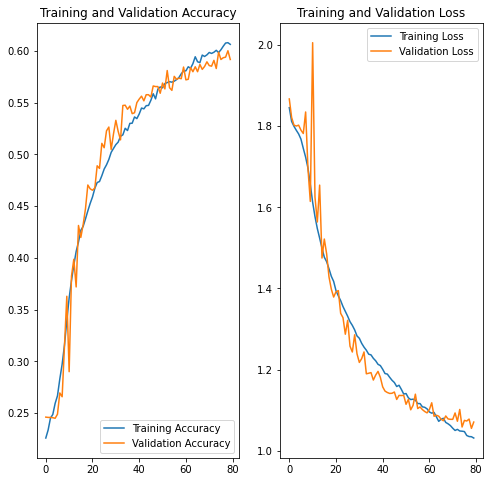

In [11]:
# build model
# heavy dropout
model = Sequential()
model.add(Conv2D(48, (3, 3), padding='same', input_shape=(48,48,3)))
model.add(Activation('relu'))

model.add(Conv2D(48*2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Conv2D(48*2*2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Conv2D(48*2*2*2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Conv2D(48*2*2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(48*2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(48*2*8))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model.compile(optimizers.Adam(lr=0.0001, decay=1e-7),loss="categorical_crossentropy",metrics=["accuracy"])

# model.compile(loss="categorical_crossentropy",
#               optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
#               metrics=['accuracy'])

print(model.summary())

# train model
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=dev_generator.n//dev_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
emotion_model = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=dev_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=80
)

# running model on test data
print(model.evaluate_generator(generator=test_generator,
steps=STEP_SIZE_TEST))

# visualize model history
acc = emotion_model.history['accuracy']
val_acc = emotion_model.history['val_accuracy']

loss = emotion_model.history['loss']
val_loss = emotion_model.history['val_loss']

epochs_range = range(80)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [12]:
# running model on test data
model.evaluate_generator(generator=test_generator,
steps=STEP_SIZE_TEST)

[1.1286063194274902, 0.5805180072784424]

## Optimized Swish Model

The model below is the same model as above except for two factors:
1. We replaced Relu activation functions with the swish activation functions, which is apparently more effective (confirmed in another test)
2. We added more dropout. While swish is more effective at learning, it quickly overfit to the training data. To combat overfitting, we added more dropout layers.
Unfortunately google cloud crashed before this model finished training, but looking through the model history, we expect it to surpass the performance of the original Relu model.

In [ ]:
# build model
# swish with heavy dropout
model = Sequential()
model.add(Conv2D(48, (3, 3), padding='same', input_shape=(48,48,3)))
model.add(Activation('swish'))

model.add(Conv2D(48*2, (3, 3)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Conv2D(48*2*2, (3, 3), padding='same'))
model.add(Activation('swish'))
model.add(Dropout(0.4))

model.add(Conv2D(48*2*2*2, (3, 3), padding='same'))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Conv2D(48*2*2, (3, 3), padding='same'))
model.add(Activation('swish'))
model.add(Conv2D(48*2, (3, 3)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(48*2*8))
model.add(Activation('swish'))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))

model.compile(optimizers.Adam(lr=0.0001, decay=1e-7),loss="categorical_crossentropy",metrics=["accuracy"])


print(model.summary())

# train model
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=dev_generator.n//dev_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
emotion_model = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=dev_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=80
)

# running model on test data
print(model.evaluate_generator(generator=test_generator,
steps=STEP_SIZE_TEST))

# visualize model history
acc = emotion_model.history['accuracy']
val_acc = emotion_model.history['val_accuracy']

loss = emotion_model.history['loss']
val_loss = emotion_model.history['val_loss']

epochs_range = range(80)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 48, 48, 48)        1344      
_________________________________________________________________
activation_16 (Activation)   (None, 48, 48, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 96)        41568     
_________________________________________________________________
activation_17 (Activation)   (None, 46, 46, 96)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 96)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 23, 23, 96)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 23, 23, 96)       

Text(0.5, 1.0, 'Training and Validation Accuracy (Swish)')

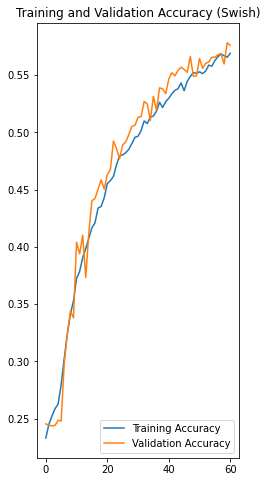

In [15]:
epochs_range = range(61)

import matplotlib.pyplot as plt

acc = [0.2331, 0.2450, 0.2524, 0.2587, 0.2627, 0.2798, 0.3026, 0.3238, 0.3413, 0.3528, 0.3724, 0.3785, 0.3905, 0.3985, 0.4075, 0.4167, 0.4210, 0.4339, 0.4353, 0.4429, 0.4552, 0.4578, 0.4615, 0.4716, 0.4796, 0.4803, 0.4823, 0.4852, 0.4902, 0.4957, 0.4966, 0.5015, 0.5100, 0.5077, 0.5132, 0.5143, 0.5185, 0.5263, 0.5217, 0.5268, 0.5298, 0.5337, 0.5367, 0.5381, 0.5431, 0.5364, 0.5445, 0.5489, 0.5521, 0.5515, 0.5529, 0.5513, 0.5535, 0.5587, 0.5578, 0.5627, 0.5661, 0.5685, 0.5669, 0.5656, 0.5691]
val_acc = [0.2455,0.2441, 0.2438, 0.2441, 0.2486, 0.2480, 0.2984, 0.3240, 0.3438, 0.3381, 0.4040, 0.3939, 0.4102, 0.3733, 0.4127, 0.4403, 0.4423, 0.4502, 0.4586, 0.4505, 0.4631, 0.4673, 0.4924, 0.4859, 0.4769, 0.4890, 0.4916, 0.4980, 0.5053, 0.5062, 0.5132, 0.5138, 0.5270, 0.5248, 0.5104, 0.5315, 0.5191, 0.5389, 0.5380, 0.5338, 0.5465, 0.5521, 0.5493, 0.5541, 0.5569, 0.5549, 0.5524, 0.5662, 0.5490, 0.5493, 0.5645, 0.5560, 0.5602, 0.5614, 0.5656, 0.5656, 0.5678, 0.5687, 0.5597, 0.5783, 0.5760]
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Swish)')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()


## Optimized model using preprocessed data

We also tried processing our image data before running the neural net to see whether or not the performance would improve.  We processed our data by normalizing it and running PCA on it to retain 98% of the original variance. Unfortunately, google cloud crashed before we were able to finish training the model, but looking through the epoch history we can make several observations:
1. The learning takes a lot longer than when using unprocessed data. 
2. The training and validation accuracies are very close, which means the model is not overfitting
3. With enough time, it looks as if this model could do well, possibly exceeding the previous two models, but it's hard to say without actually running it
4. It doesn't appear to do much better than previous models, at least not for a comparable range of epochs

In [13]:
# preprocessed image data model

# first preprocess images

# decreasing dimensionality of data
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


pixellist =df['pixels'].tolist()
pixelarray = np.array(pixellist)

scaler = StandardScaler()
normalizedpixels = scaler.fit_transform(pixelarray)

pca = PCA(.98)
lower_dimensional_data = pca.fit_transform(normalizedpixels)
print(pca.n_components_)

approximation = pca.inverse_transform(lower_dimensional_data)


df = data
df['pixels'] = pd.Series(approximation.tolist()) 



# Create directories
dataset_names = ['ntrain','ndev','ntest']

for i in dataset_names:
    dirName = i
    try:
        # Create target Directory
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ") 
    except FileExistsError:
        print("Directory " , dirName ,  " already exists")


# generate png images from pixel values and write them to appropriate directory
plt.ioff()

for i in range(df.shape[0]):
    fig = plt.figure(frameon=False)
    # print(i)
    plt.imshow(np.reshape(df['pixels'][i],(48,48)),cmap='Greys_r')
    plt.axis('off')
    dataset_class = df['Usage'][i]
    if dataset_class == 'Training':
        fig.savefig('./ntrain/' + df['id'][i])
    if dataset_class == 'PrivateTest':
        fig.savefig('./ndev/' + df['id'][i])
    if dataset_class == 'PublicTest':
        fig.savefig('./ntest/' + df['id'][i])
    plt.close(fig)


# plt.imshow(np.reshape(df['pixels'].iloc[0:0],(48,48)),cmap='Greys_r')
print('Writing finished - you may now continue.')





datagen=ImageDataGenerator(rescale=1./255.)

train_generator=datagen.flow_from_dataframe(
dataframe=df[df['Usage']=='Training'],
directory="./ntrain/",
x_col="id",
y_col="emotion",
batch_size=48*2,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(48,48))

dev_generator=datagen.flow_from_dataframe(
dataframe=df[df['Usage']=='PrivateTest'],
directory="./ndev/",
x_col="id",
y_col="emotion",
batch_size=48*2,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(48,48))

test_generator=datagen.flow_from_dataframe(
dataframe=df[df['Usage']=='PublicTest'],
directory="./ntest/",
x_col="id",
y_col="emotion",
batch_size=48*2,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(48,48))




model = Sequential()
model.add(Conv2D(48, (3, 3), padding='same',
                 input_shape=(48,48,3)))
model.add(Activation('relu'))


model.add(Conv2D(48*2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(BatchNormalization())

model.add(Conv2D(48*2*2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Conv2D(48*2*2*2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Conv2D(48*2*2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(48*2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(48*2*8))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(optimizers.Adam(lr=0.0001, decay=1e-7),loss="categorical_crossentropy",metrics=["accuracy"])

print(model.summary())

# train model
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=dev_generator.n//dev_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
emotion_model = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=dev_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=120
)

# running model on test data
print(model.evaluate_generator(generator=test_generator,
steps=STEP_SIZE_TEST))

# visualize model history
acc = emotion_model.history['accuracy']
val_acc = emotion_model.history['val_accuracy']

loss = emotion_model.history['loss']
val_loss = emotion_model.history['val_loss']

epochs_range = range(120)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


NameError: name 'df' is not defined

Model history (before it crashed):

Text(0.5, 1.0, 'Training and Validation Accuracy (Preprocessed Model)')

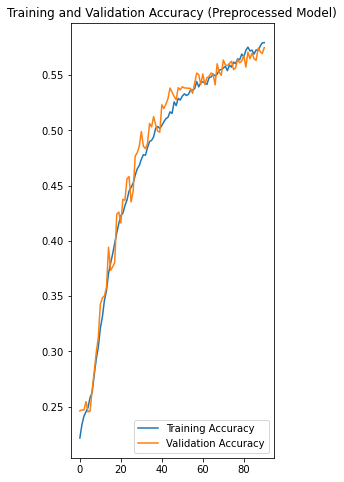

In [14]:
epochs = "Epoch 1/100 299/299 [==============================] - 930s 3s/step - loss: 1.8482 - accuracy: 0.2215 - val_loss: 1.8599 - val_accuracy: 0.2461 Epoch 2/100 299/299 [==============================] - 929s 3s/step - loss: 1.8161 - accuracy: 0.2334 - val_loss: 1.8396 - val_accuracy: 0.2469 Epoch 3/100 299/299 [==============================] - 933s 3s/step - loss: 1.8049 - accuracy: 0.2413 - val_loss: 1.8245 - val_accuracy: 0.2469 Epoch 4/100 299/299 [==============================] - 929s 3s/step - loss: 1.7987 - accuracy: 0.2452 - val_loss: 1.8154 - val_accuracy: 0.2545 Epoch 5/100 299/299 [==============================] - 932s 3s/step - loss: 1.7914 - accuracy: 0.2492 - val_loss: 1.7968 - val_accuracy: 0.2452 Epoch 6/100 299/299 [==============================] - 928s 3s/step - loss: 1.7805 - accuracy: 0.2582 - val_loss: 1.7973 - val_accuracy: 0.2458 Epoch 7/100 299/299 [==============================] - 929s 3s/step - loss: 1.7700 - accuracy: 0.2626 - val_loss: 1.8211 - val_accuracy: 0.2652 Epoch 8/100 299/299 [==============================] - 926s 3s/step - loss: 1.7443 - accuracy: 0.2783 - val_loss: 1.7904 - val_accuracy: 0.2812 Epoch 9/100 299/299 [==============================] - 931s 3s/step - loss: 1.7245 - accuracy: 0.2929 - val_loss: 1.7161 - val_accuracy: 0.2990 Epoch 10/100 299/299 [==============================] - 926s 3s/step - loss: 1.7037 - accuracy: 0.3037 - val_loss: 1.6812 - val_accuracy: 0.3125 Epoch 11/100 299/299 [==============================] - 924s 3s/step - loss: 1.6830 - accuracy: 0.3209 - val_loss: 1.6493 - val_accuracy: 0.3426 Epoch 12/100 299/299 [==============================] - 928s 3s/step - loss: 1.6649 - accuracy: 0.3312 - val_loss: 1.6386 - val_accuracy: 0.3483 Epoch 13/100 299/299 [==============================] - 926s 3s/step - loss: 1.6466 - accuracy: 0.3461 - val_loss: 1.6540 - val_accuracy: 0.3502 Epoch 14/100 299/299 [==============================] - 923s 3s/step - loss: 1.6259 - accuracy: 0.3549 - val_loss: 1.6137 - val_accuracy: 0.3578 Epoch 15/100 299/299 [==============================] - 926s 3s/step - loss: 1.5988 - accuracy: 0.3706 - val_loss: 1.5518 - val_accuracy: 0.3941 Epoch 16/100 299/299 [==============================] - 930s 3s/step - loss: 1.5743 - accuracy: 0.3796 - val_loss: 1.5842 - val_accuracy: 0.3733 Epoch 17/100 299/299 [==============================] - 925s 3s/step - loss: 1.5613 - accuracy: 0.3881 - val_loss: 1.5965 - val_accuracy: 0.3764 Epoch 18/100 299/299 [==============================] - 923s 3s/step - loss: 1.5407 - accuracy: 0.3976 - val_loss: 1.6339 - val_accuracy: 0.3803 Epoch 19/100 299/299 [==============================] - 931s 3s/step - loss: 1.5201 - accuracy: 0.4071 - val_loss: 1.4813 - val_accuracy: 0.4240 Epoch 20/100 299/299 [==============================] - 929s 3s/step - loss: 1.5023 - accuracy: 0.4155 - val_loss: 1.4643 - val_accuracy: 0.4260 Epoch 21/100 299/299 [==============================] - 927s 3s/step - loss: 1.4868 - accuracy: 0.4228 - val_loss: 1.5213 - val_accuracy: 0.4161 Epoch 22/100 299/299 [==============================] - 922s 3s/step - loss: 1.4735 - accuracy: 0.4250 - val_loss: 1.4466 - val_accuracy: 0.4375 Epoch 23/100 299/299 [==============================] - 927s 3s/step - loss: 1.4635 - accuracy: 0.4318 - val_loss: 1.4595 - val_accuracy: 0.4367 Epoch 24/100 299/299 [==============================] - 929s 3s/step - loss: 1.4473 - accuracy: 0.4369 - val_loss: 1.3903 - val_accuracy: 0.4561 Epoch 25/100 299/299 [==============================] - 927s 3s/step - loss: 1.4351 - accuracy: 0.4450 - val_loss: 1.4101 - val_accuracy: 0.4581 Epoch 26/100 299/299 [==============================] - 929s 3s/step - loss: 1.4207 - accuracy: 0.4483 - val_loss: 1.4539 - val_accuracy: 0.4352 Epoch 27/100 299/299 [==============================] - 928s 3s/step - loss: 1.4116 - accuracy: 0.4521 - val_loss: 1.4365 - val_accuracy: 0.4448 Epoch 28/100 299/299 [==============================] - 931s 3s/step - loss: 1.3946 - accuracy: 0.4593 - val_loss: 1.3572 - val_accuracy: 0.4766 Epoch 29/100 299/299 [==============================] - 926s 3s/step - loss: 1.3833 - accuracy: 0.4651 - val_loss: 1.3462 - val_accuracy: 0.4797 Epoch 30/100 299/299 [==============================] - 922s 3s/step - loss: 1.3762 - accuracy: 0.4681 - val_loss: 1.3251 - val_accuracy: 0.4856 Epoch 31/100 299/299 [==============================] - 925s 3s/step - loss: 1.3617 - accuracy: 0.4737 - val_loss: 1.3009 - val_accuracy: 0.4989 Epoch 32/100 299/299 [==============================] - 927s 3s/step - loss: 1.3512 - accuracy: 0.4779 - val_loss: 1.3178 - val_accuracy: 0.4856 Epoch 33/100 299/299 [==============================] - 923s 3s/step - loss: 1.3457 - accuracy: 0.4775 - val_loss: 1.3114 - val_accuracy: 0.4834 Epoch 34/100 299/299 [==============================] - 925s 3s/step - loss: 1.3331 - accuracy: 0.4842 - val_loss: 1.2965 - val_accuracy: 0.4879 Epoch 35/100 299/299 [==============================] - 929s 3s/step - loss: 1.3242 - accuracy: 0.4898 - val_loss: 1.2869 - val_accuracy: 0.5062 Epoch 36/100 299/299 [==============================] - 929s 3s/step - loss: 1.3199 - accuracy: 0.4909 - val_loss: 1.2758 - val_accuracy: 0.5031 Epoch 37/100 299/299 [==============================] - 925s 3s/step - loss: 1.3116 - accuracy: 0.4941 - val_loss: 1.2587 - val_accuracy: 0.5124 Epoch 38/100 299/299 [==============================] - 922s 3s/step - loss: 1.3013 - accuracy: 0.5020 - val_loss: 1.2529 - val_accuracy: 0.5048 Epoch 39/100 299/299 [==============================] - 926s 3s/step - loss: 1.2916 - accuracy: 0.5034 - val_loss: 1.3008 - val_accuracy: 0.4992 Epoch 40/100 299/299 [==============================] - 927s 3s/step - loss: 1.2900 - accuracy: 0.5016 - val_loss: 1.3021 - val_accuracy: 0.4983 Epoch 41/100 299/299 [==============================] - 931s 3s/step - loss: 1.2843 - accuracy: 0.5043 - val_loss: 1.2373 - val_accuracy: 0.5231 Epoch 42/100 299/299 [==============================] - 941s 3s/step - loss: 1.2772 - accuracy: 0.5077 - val_loss: 1.2286 - val_accuracy: 0.5197 Epoch 43/100 299/299 [==============================] - 937s 3s/step - loss: 1.2710 - accuracy: 0.5105 - val_loss: 1.2294 - val_accuracy: 0.5236 Epoch 44/100 299/299 [==============================] - 935s 3s/step - loss: 1.2639 - accuracy: 0.5118 - val_loss: 1.2191 - val_accuracy: 0.5287 Epoch 45/100 299/299 [==============================] - 933s 3s/step - loss: 1.2595 - accuracy: 0.5167 - val_loss: 1.2016 - val_accuracy: 0.5383 Epoch 46/100 299/299 [==============================] - 935s 3s/step - loss: 1.2474 - accuracy: 0.5153 - val_loss: 1.2049 - val_accuracy: 0.5346 Epoch 47/100 299/299 [==============================] - 931s 3s/step - loss: 1.2369 - accuracy: 0.5257 - val_loss: 1.2021 - val_accuracy: 0.5307 Epoch 48/100 299/299 [==============================] - 934s 3s/step - loss: 1.2417 - accuracy: 0.5224 - val_loss: 1.2203 - val_accuracy: 0.5276 Epoch 49/100 299/299 [==============================] - 925s 3s/step - loss: 1.2353 - accuracy: 0.5289 - val_loss: 1.1906 - val_accuracy: 0.5386 Epoch 50/100 299/299 [==============================] - 928s 3s/step - loss: 1.2315 - accuracy: 0.5274 - val_loss: 1.2009 - val_accuracy: 0.5366 Epoch 51/100 299/299 [==============================] - 924s 3s/step - loss: 1.2259 - accuracy: 0.5309 - val_loss: 1.1773 - val_accuracy: 0.5394 Epoch 52/100 299/299 [==============================] - 927s 3s/step - loss: 1.2214 - accuracy: 0.5330 - val_loss: 1.1864 - val_accuracy: 0.5383 Epoch 53/100 299/299 [==============================] - 934s 3s/step - loss: 1.2161 - accuracy: 0.5315 - val_loss: 1.1820 - val_accuracy: 0.5383 Epoch 54/100 299/299 [==============================] - 928s 3s/step - loss: 1.2163 - accuracy: 0.5326 - val_loss: 1.1867 - val_accuracy: 0.5380 Epoch 55/100 299/299 [==============================] - 928s 3s/step - loss: 1.2079 - accuracy: 0.5364 - val_loss: 1.1815 - val_accuracy: 0.5380 Epoch 56/100 299/299 [==============================] - 927s 3s/step - loss: 1.2096 - accuracy: 0.5364 - val_loss: 1.1931 - val_accuracy: 0.5335 Epoch 57/100 299/299 [==============================] - 929s 3s/step - loss: 1.1993 - accuracy: 0.5376 - val_loss: 1.1718 - val_accuracy: 0.5425 Epoch 58/100 299/299 [==============================] - 929s 3s/step - loss: 1.1949 - accuracy: 0.5442 - val_loss: 1.1629 - val_accuracy: 0.5518 Epoch 59/100 299/299 [==============================] - 926s 3s/step - loss: 1.1976 - accuracy: 0.5393 - val_loss: 1.1588 - val_accuracy: 0.5504 Epoch 60/100 299/299 [==============================] - 925s 3s/step - loss: 1.1944 - accuracy: 0.5430 - val_loss: 1.1789 - val_accuracy: 0.5414 Epoch 61/100 299/299 [==============================] - 928s 3s/step - loss: 1.1839 - accuracy: 0.5439 - val_loss: 1.1597 - val_accuracy: 0.5510 Epoch 62/100 299/299 [==============================] - 924s 3s/step - loss: 1.1827 - accuracy: 0.5428 - val_loss: 1.1603 - val_accuracy: 0.5414 Epoch 63/100 299/299 [==============================] - 929s 3s/step - loss: 1.1834 - accuracy: 0.5415 - val_loss: 1.1553 - val_accuracy: 0.5476 Epoch 64/100 299/299 [==============================] - 928s 3s/step - loss: 1.1770 - accuracy: 0.5475 - val_loss: 1.1572 - val_accuracy: 0.5487 Epoch 65/100 299/299 [==============================] - 928s 3s/step - loss: 1.1727 - accuracy: 0.5482 - val_loss: 1.1455 - val_accuracy: 0.5518 Epoch 66/100 299/299 [==============================] - 925s 3s/step - loss: 1.1718 - accuracy: 0.5507 - val_loss: 1.1407 - val_accuracy: 0.5510 Epoch 67/100 299/299 [==============================] - 926s 3s/step - loss: 1.1722 - accuracy: 0.5493 - val_loss: 1.1584 - val_accuracy: 0.5411 Epoch 68/100 299/299 [==============================] - 918s 3s/step - loss: 1.1680 - accuracy: 0.5507 - val_loss: 1.1472 - val_accuracy: 0.5602 Epoch 69/100 299/299 [==============================] - 913s 3s/step - loss: 1.1585 - accuracy: 0.5545 - val_loss: 1.1458 - val_accuracy: 0.5526 Epoch 70/100 299/299 [==============================] - 914s 3s/step - loss: 1.1589 - accuracy: 0.5549 - val_loss: 1.1434 - val_accuracy: 0.5498 Epoch 71/100 299/299 [==============================] - 916s 3s/step - loss: 1.1596 - accuracy: 0.5564 - val_loss: 1.1372 - val_accuracy: 0.5636 Epoch 72/100 299/299 [==============================] - 916s 3s/step - loss: 1.1553 - accuracy: 0.5578 - val_loss: 1.1345 - val_accuracy: 0.5591 Epoch 73/100 299/299 [==============================] - 919s 3s/step - loss: 1.1518 - accuracy: 0.5540 - val_loss: 1.1343 - val_accuracy: 0.5586 Epoch 74/100 299/299 [==============================] - 931s 3s/step - loss: 1.1496 - accuracy: 0.5591 - val_loss: 1.1338 - val_accuracy: 0.5605 Epoch 75/100 299/299 [==============================] - 925s 3s/step - loss: 1.1488 - accuracy: 0.5571 - val_loss: 1.1378 - val_accuracy: 0.5625 Epoch 76/100 299/299 [==============================] - 926s 3s/step - loss: 1.1428 - accuracy: 0.5617 - val_loss: 1.1302 - val_accuracy: 0.5549 Epoch 77/100 299/299 [==============================] - 925s 3s/step - loss: 1.1422 - accuracy: 0.5603 - val_loss: 1.1352 - val_accuracy: 0.5566 Epoch 78/100 299/299 [==============================] - 919s 3s/step - loss: 1.1385 - accuracy: 0.5647 - val_loss: 1.1272 - val_accuracy: 0.5642 Epoch 79/100 299/299 [==============================] - 926s 3s/step - loss: 1.1349 - accuracy: 0.5639 - val_loss: 1.1217 - val_accuracy: 0.5611 Epoch 80/100 299/299 [==============================] - 929s 3s/step - loss: 1.1269 - accuracy: 0.5690 - val_loss: 1.1240 - val_accuracy: 0.5628 Epoch 81/100 299/299 [==============================] - 931s 3s/step - loss: 1.1315 - accuracy: 0.5665 - val_loss: 1.1224 - val_accuracy: 0.5676 Epoch 82/100 299/299 [==============================] - 925s 3s/step - loss: 1.1204 - accuracy: 0.5724 - val_loss: 1.1392 - val_accuracy: 0.5572 Epoch 83/100 299/299 [==============================] - 924s 3s/step - loss: 1.1196 - accuracy: 0.5753 - val_loss: 1.1199 - val_accuracy: 0.5707 Epoch 84/100 299/299 [==============================] - 926s 3s/step - loss: 1.1186 - accuracy: 0.5718 - val_loss: 1.1402 - val_accuracy: 0.5648 Epoch 85/100 299/299 [==============================] - 925s 3s/step - loss: 1.1202 - accuracy: 0.5726 - val_loss: 1.1211 - val_accuracy: 0.5698 Epoch 86/100 299/299 [==============================] - 927s 3s/step - loss: 1.1216 - accuracy: 0.5689 - val_loss: 1.1146 - val_accuracy: 0.5648 Epoch 87/100 299/299 [==============================] - 923s 3s/step - loss: 1.1158 - accuracy: 0.5728 - val_loss: 1.1159 - val_accuracy: 0.5633 Epoch 88/100 299/299 [==============================] - 924s 3s/step - loss: 1.1190 - accuracy: 0.5721 - val_loss: 1.1074 - val_accuracy: 0.5743 Epoch 89/100 299/299 [==============================] - 928s 3s/step - loss: 1.1108 - accuracy: 0.5762 - val_loss: 1.1149 - val_accuracy: 0.5712 Epoch 90/100 299/299 [==============================] - 924s 3s/step - loss: 1.1052 - accuracy: 0.5791 - val_loss: 1.1122 - val_accuracy: 0.5695 Epoch 91/100 299/299 [==============================] - 923s 3s/step - loss: 1.1071 - accuracy: 0.5793 - val_loss: 1.1132 - val_accuracy: 0.5749 Epoch 92/100 276/299 [==========================>...] - ETA: 1:08 - loss: 1.1079 - accuracy: 0.5755"

splitepochs = epochs.split()
import matplotlib.pyplot as plt
import numpy as np

def findacc(stringepoch, accuracytype):
    acclist = []
    epochlist = stringepoch
    for i in range(len(stringepoch)):
        if epochlist[i] == accuracytype:
            acclist.append(epochlist[i+1])
    return acclist
acc = findacc(splitepochs, "accuracy:")
acc = acc[:-1]

val_acc = findacc(splitepochs, "val_accuracy:")

acc = [float(i) for i in acc]
val_acc = [float(i) for i in val_acc]

epochs_range = range(91)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.yticks(np.arange(min(acc), max(val_acc)+1))

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Preprocessed Model)')


# Comparison of Optimal Model, Optimal Swish Model, Optimal Model using preprocessing

80
61
91


Text(0.5, 1.0, 'Validation Accuracy Comparisons')

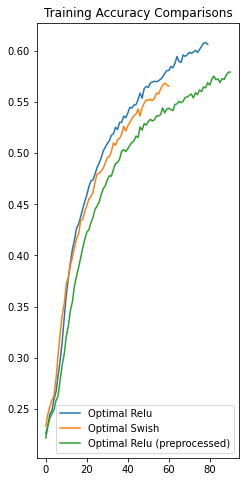

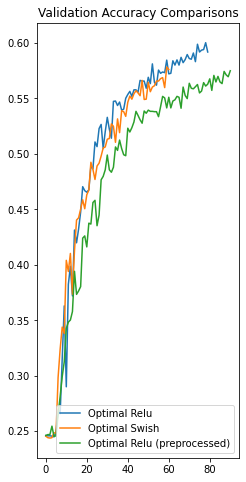

In [19]:
optimal_epochs = "Epoch 1/80 299/299 [==============================] - 508s 2s/step - loss: 1.8452 - accuracy: 0.2258 - val_loss: 1.8667 - val_accuracy: 0.2461 Epoch 2/80 299/299 [==============================] - 495s 2s/step - loss: 1.8113 - accuracy: 0.2336 - val_loss: 1.8212 - val_accuracy: 0.2458 Epoch 3/80 299/299 [==============================] - 497s 2s/step - loss: 1.7994 - accuracy: 0.2451 - val_loss: 1.8023 - val_accuracy: 0.2458 Epoch 4/80 299/299 [==============================] - 488s 2s/step - loss: 1.7896 - accuracy: 0.2486 - val_loss: 1.8001 - val_accuracy: 0.2455 Epoch 5/80 299/299 [==============================] - 493s 2s/step - loss: 1.7805 - accuracy: 0.2593 - val_loss: 1.8022 - val_accuracy: 0.2449 Epoch 6/80 299/299 [==============================] - 493s 2s/step - loss: 1.7677 - accuracy: 0.2667 - val_loss: 1.7899 - val_accuracy: 0.2489 Epoch 7/80 299/299 [==============================] - 497s 2s/step - loss: 1.7450 - accuracy: 0.2829 - val_loss: 1.7816 - val_accuracy: 0.2694 Epoch 8/80 299/299 [==============================] - 496s 2s/step - loss: 1.7233 - accuracy: 0.2972 - val_loss: 1.8346 - val_accuracy: 0.2658 Epoch 9/80 299/299 [==============================] - 494s 2s/step - loss: 1.6964 - accuracy: 0.3157 - val_loss: 1.6952 - val_accuracy: 0.3148 Epoch 10/80 299/299 [==============================] - 494s 2s/step - loss: 1.6563 - accuracy: 0.3392 - val_loss: 1.6143 - val_accuracy: 0.3629 Epoch 11/80 299/299 [==============================] - 496s 2s/step - loss: 1.6124 - accuracy: 0.3612 - val_loss: 2.0053 - val_accuracy: 0.2900 Epoch 12/80 299/299 [==============================] - 496s 2s/step - loss: 1.5771 - accuracy: 0.3780 - val_loss: 1.6251 - val_accuracy: 0.3823 Epoch 13/80 299/299 [==============================] - 492s 2s/step - loss: 1.5476 - accuracy: 0.3930 - val_loss: 1.5636 - val_accuracy: 0.3986 Epoch 14/80 299/299 [==============================] - 494s 2s/step - loss: 1.5239 - accuracy: 0.4062 - val_loss: 1.6545 - val_accuracy: 0.3719 Epoch 15/80 299/299 [==============================] - 495s 2s/step - loss: 1.4992 - accuracy: 0.4153 - val_loss: 1.4749 - val_accuracy: 0.4313 Epoch 16/80 299/299 [==============================] - 494s 2s/step - loss: 1.4769 - accuracy: 0.4267 - val_loss: 1.5217 - val_accuracy: 0.4198 Epoch 17/80 299/299 [==============================] - 493s 2s/step - loss: 1.4658 - accuracy: 0.4305 - val_loss: 1.4850 - val_accuracy: 0.4322 Epoch 18/80 299/299 [==============================] - 492s 2s/step - loss: 1.4485 - accuracy: 0.4377 - val_loss: 1.4284 - val_accuracy: 0.4476 Epoch 19/80 299/299 [==============================] - 493s 2s/step - loss: 1.4299 - accuracy: 0.4454 - val_loss: 1.3983 - val_accuracy: 0.4704 Epoch 20/80 299/299 [==============================] - 493s 2s/step - loss: 1.4173 - accuracy: 0.4526 - val_loss: 1.3788 - val_accuracy: 0.4668 Epoch 21/80 299/299 [==============================] - 494s 2s/step - loss: 1.3947 - accuracy: 0.4589 - val_loss: 1.3917 - val_accuracy: 0.4654 Epoch 22/80 299/299 [==============================] - 493s 2s/step - loss: 1.3817 - accuracy: 0.4672 - val_loss: 1.3946 - val_accuracy: 0.4676 Epoch 23/80 299/299 [==============================] - 494s 2s/step - loss: 1.3700 - accuracy: 0.4728 - val_loss: 1.3387 - val_accuracy: 0.4890 Epoch 24/80 299/299 [==============================] - 494s 2s/step - loss: 1.3554 - accuracy: 0.4738 - val_loss: 1.3280 - val_accuracy: 0.4865 Epoch 25/80 299/299 [==============================] - 497s 2s/step - loss: 1.3434 - accuracy: 0.4794 - val_loss: 1.2872 - val_accuracy: 0.5107 Epoch 26/80 299/299 [==============================] - 496s 2s/step - loss: 1.3316 - accuracy: 0.4859 - val_loss: 1.3215 - val_accuracy: 0.5065 Epoch 27/80 299/299 [==============================] - 494s 2s/step - loss: 1.3181 - accuracy: 0.4900 - val_loss: 1.2578 - val_accuracy: 0.5228 Epoch 28/80 299/299 [==============================] - 495s 2s/step - loss: 1.3090 - accuracy: 0.4951 - val_loss: 1.2434 - val_accuracy: 0.5265 Epoch 29/80 299/299 [==============================] - 494s 2s/step - loss: 1.2978 - accuracy: 0.5020 - val_loss: 1.2858 - val_accuracy: 0.5048 Epoch 30/80 299/299 [==============================] - 496s 2s/step - loss: 1.2830 - accuracy: 0.5058 - val_loss: 1.2388 - val_accuracy: 0.5200 Epoch 31/80 299/299 [==============================] - 492s 2s/step - loss: 1.2772 - accuracy: 0.5095 - val_loss: 1.2177 - val_accuracy: 0.5329 Epoch 32/80 299/299 [==============================] - 495s 2s/step - loss: 1.2648 - accuracy: 0.5119 - val_loss: 1.2271 - val_accuracy: 0.5222 Epoch 33/80 299/299 [==============================] - 495s 2s/step - loss: 1.2554 - accuracy: 0.5175 - val_loss: 1.2436 - val_accuracy: 0.5141 Epoch 34/80 299/299 [==============================] - 498s 2s/step - loss: 1.2479 - accuracy: 0.5189 - val_loss: 1.1897 - val_accuracy: 0.5473 Epoch 35/80 299/299 [==============================] - 496s 2s/step - loss: 1.2381 - accuracy: 0.5253 - val_loss: 1.1911 - val_accuracy: 0.5476 Epoch 36/80 299/299 [==============================] - 494s 2s/step - loss: 1.2363 - accuracy: 0.5231 - val_loss: 1.1926 - val_accuracy: 0.5436 Epoch 37/80 299/299 [==============================] - 493s 2s/step - loss: 1.2278 - accuracy: 0.5300 - val_loss: 1.1743 - val_accuracy: 0.5467 Epoch 38/80 299/299 [==============================] - 491s 2s/step - loss: 1.2218 - accuracy: 0.5302 - val_loss: 1.1867 - val_accuracy: 0.5394 Epoch 39/80 299/299 [==============================] - 491s 2s/step - loss: 1.2131 - accuracy: 0.5362 - val_loss: 1.1956 - val_accuracy: 0.5403 Epoch 40/80 299/299 [==============================] - 494s 2s/step - loss: 1.2100 - accuracy: 0.5346 - val_loss: 1.1810 - val_accuracy: 0.5501 Epoch 41/80 299/299 [==============================] - 491s 2s/step - loss: 1.2009 - accuracy: 0.5391 - val_loss: 1.1575 - val_accuracy: 0.5535 Epoch 42/80 299/299 [==============================] - 494s 2s/step - loss: 1.1903 - accuracy: 0.5448 - val_loss: 1.1471 - val_accuracy: 0.5563 Epoch 43/80 299/299 [==============================] - 496s 2s/step - loss: 1.1890 - accuracy: 0.5441 - val_loss: 1.1436 - val_accuracy: 0.5518 Epoch 44/80 299/299 [==============================] - 491s 2s/step - loss: 1.1811 - accuracy: 0.5471 - val_loss: 1.1413 - val_accuracy: 0.5577 Epoch 45/80 299/299 [==============================] - 494s 2s/step - loss: 1.1738 - accuracy: 0.5474 - val_loss: 1.1418 - val_accuracy: 0.5577 Epoch 46/80 299/299 [==============================] - 492s 2s/step - loss: 1.1682 - accuracy: 0.5523 - val_loss: 1.1448 - val_accuracy: 0.5555 Epoch 47/80 299/299 [==============================] - 495s 2s/step - loss: 1.1584 - accuracy: 0.5587 - val_loss: 1.1266 - val_accuracy: 0.5662 Epoch 48/80 299/299 [==============================] - 496s 2s/step - loss: 1.1615 - accuracy: 0.5537 - val_loss: 1.1365 - val_accuracy: 0.5656 Epoch 49/80 299/299 [==============================] - 495s 2s/step - loss: 1.1513 - accuracy: 0.5631 - val_loss: 1.1362 - val_accuracy: 0.5656 Epoch 50/80 299/299 [==============================] - 497s 2s/step - loss: 1.1399 - accuracy: 0.5652 - val_loss: 1.1367 - val_accuracy: 0.5591 Epoch 51/80 299/299 [==============================] - 491s 2s/step - loss: 1.1411 - accuracy: 0.5644 - val_loss: 1.1146 - val_accuracy: 0.5690 Epoch 52/80 299/299 [==============================] - 495s 2s/step - loss: 1.1305 - accuracy: 0.5685 - val_loss: 1.1266 - val_accuracy: 0.5633 Epoch 53/80 299/299 [==============================] - 496s 2s/step - loss: 1.1263 - accuracy: 0.5695 - val_loss: 1.1011 - val_accuracy: 0.5811 Epoch 54/80 299/299 [==============================] - 490s 2s/step - loss: 1.1272 - accuracy: 0.5703 - val_loss: 1.1119 - val_accuracy: 0.5645 Epoch 55/80 299/299 [==============================] - 495s 2s/step - loss: 1.1251 - accuracy: 0.5698 - val_loss: 1.1395 - val_accuracy: 0.5619 Epoch 56/80 299/299 [==============================] - 497s 2s/step - loss: 1.1164 - accuracy: 0.5708 - val_loss: 1.1042 - val_accuracy: 0.5755 Epoch 57/80 299/299 [==============================] - 491s 2s/step - loss: 1.1164 - accuracy: 0.5723 - val_loss: 1.1081 - val_accuracy: 0.5726 Epoch 58/80 299/299 [==============================] - 495s 2s/step - loss: 1.1084 - accuracy: 0.5743 - val_loss: 1.1016 - val_accuracy: 0.5738 Epoch 59/80 299/299 [==============================] - 490s 2s/step - loss: 1.1072 - accuracy: 0.5779 - val_loss: 1.0968 - val_accuracy: 0.5732 Epoch 60/80 299/299 [==============================] - 491s 2s/step - loss: 1.1034 - accuracy: 0.5807 - val_loss: 1.0935 - val_accuracy: 0.5845 Epoch 61/80 299/299 [==============================] - 493s 2s/step - loss: 1.0958 - accuracy: 0.5808 - val_loss: 1.1017 - val_accuracy: 0.5721 Epoch 62/80 299/299 [==============================] - 495s 2s/step - loss: 1.0927 - accuracy: 0.5847 - val_loss: 1.1184 - val_accuracy: 0.5726 Epoch 63/80 299/299 [==============================] - 492s 2s/step - loss: 1.0946 - accuracy: 0.5833 - val_loss: 1.0851 - val_accuracy: 0.5839 Epoch 64/80 299/299 [==============================] - 493s 2s/step - loss: 1.0837 - accuracy: 0.5877 - val_loss: 1.0877 - val_accuracy: 0.5800 Epoch 65/80 299/299 [==============================] - 493s 2s/step - loss: 1.0726 - accuracy: 0.5944 - val_loss: 1.0853 - val_accuracy: 0.5847 Epoch 66/80 299/299 [==============================] - 492s 2s/step - loss: 1.0777 - accuracy: 0.5896 - val_loss: 1.0779 - val_accuracy: 0.5800 Epoch 67/80 299/299 [==============================] - 494s 2s/step - loss: 1.0802 - accuracy: 0.5888 - val_loss: 1.0741 - val_accuracy: 0.5870 Epoch 68/80 299/299 [==============================] - 495s 2s/step - loss: 1.0700 - accuracy: 0.5960 - val_loss: 1.0859 - val_accuracy: 0.5822 Epoch 69/80 299/299 [==============================] - 496s 2s/step - loss: 1.0666 - accuracy: 0.5947 - val_loss: 1.0785 - val_accuracy: 0.5850 Epoch 70/80 299/299 [==============================] - 497s 2s/step - loss: 1.0622 - accuracy: 0.5962 - val_loss: 1.0776 - val_accuracy: 0.5895 Epoch 71/80 299/299 [==============================] - 495s 2s/step - loss: 1.0557 - accuracy: 0.5985 - val_loss: 1.0775 - val_accuracy: 0.5859 Epoch 72/80 299/299 [==============================] - 494s 2s/step - loss: 1.0502 - accuracy: 0.5976 - val_loss: 1.0933 - val_accuracy: 0.5853 Epoch 73/80 299/299 [==============================] - 497s 2s/step - loss: 1.0529 - accuracy: 0.5988 - val_loss: 1.0728 - val_accuracy: 0.5909 Epoch 74/80 299/299 [==============================] - 493s 2s/step - loss: 1.0489 - accuracy: 0.6006 - val_loss: 1.1019 - val_accuracy: 0.5831 Epoch 75/80 299/299 [==============================] - 495s 2s/step - loss: 1.0484 - accuracy: 0.5985 - val_loss: 1.0587 - val_accuracy: 0.5988 Epoch 76/80 299/299 [==============================] - 488s 2s/step - loss: 1.0474 - accuracy: 0.6012 - val_loss: 1.0750 - val_accuracy: 0.5918 Epoch 77/80 299/299 [==============================] - 493s 2s/step - loss: 1.0377 - accuracy: 0.6046 - val_loss: 1.0734 - val_accuracy: 0.5935 Epoch 78/80 299/299 [==============================] - 494s 2s/step - loss: 1.0352 - accuracy: 0.6077 - val_loss: 1.0782 - val_accuracy: 0.5940 Epoch 79/80 299/299 [==============================] - 493s 2s/step - loss: 1.0348 - accuracy: 0.6080 - val_loss: 1.0553 - val_accuracy: 0.6002 Epoch 80/80 299/299 [==============================] - 490s 2s/step - loss: 1.0315 - accuracy: 0.6064 - val_loss: 1.0709 - val_accuracy: 0.5918"
optimal_swish_epochs = "Epoch 1/80 299/299 [==============================] - 618s 2s/step - loss: 1.8278 - accuracy: 0.2331 - val_loss: 1.8627 - val_accuracy: 0.2455 Epoch 2/80 299/299 [==============================] - 614s 2s/step - loss: 1.8020 - accuracy: 0.2450 - val_loss: 1.8185 - val_accuracy: 0.2441 Epoch 3/80 299/299 [==============================] - 617s 2s/step - loss: 1.7925 - accuracy: 0.2524 - val_loss: 1.8536 - val_accuracy: 0.2438 Epoch 4/80 299/299 [==============================] - 618s 2s/step - loss: 1.7844 - accuracy: 0.2587 - val_loss: 1.8417 - val_accuracy: 0.2441 Epoch 5/80 299/299 [==============================] - 614s 2s/step - loss: 1.7760 - accuracy: 0.2627 - val_loss: 1.8168 - val_accuracy: 0.2486 Epoch 6/80 299/299 [==============================] - 615s 2s/step - loss: 1.7547 - accuracy: 0.2798 - val_loss: 1.8377 - val_accuracy: 0.2480 Epoch 7/80 299/299 [==============================] - 617s 2s/step - loss: 1.7251 - accuracy: 0.3026 - val_loss: 1.7134 - val_accuracy: 0.2984 Epoch 8/80 299/299 [==============================] - 616s 2s/step - loss: 1.6886 - accuracy: 0.3238 - val_loss: 1.6544 - val_accuracy: 0.3240 Epoch 9/80 299/299 [==============================] - 615s 2s/step - loss: 1.6595 - accuracy: 0.3413 - val_loss: 1.6353 - val_accuracy: 0.3438 Epoch 10/80 299/299 [==============================] - 615s 2s/step - loss: 1.6304 - accuracy: 0.3528 - val_loss: 1.6531 - val_accuracy: 0.3381 Epoch 11/80 299/299 [==============================] - 615s 2s/step - loss: 1.6013 - accuracy: 0.3724 - val_loss: 1.5519 - val_accuracy: 0.4040 Epoch 12/80 299/299 [==============================] - 617s 2s/step - loss: 1.5836 - accuracy: 0.3785 - val_loss: 1.5534 - val_accuracy: 0.3939 Epoch 13/80 299/299 [==============================] - 615s 2s/step - loss: 1.5623 - accuracy: 0.3905 - val_loss: 1.5183 - val_accuracy: 0.4102 Epoch 14/80 299/299 [==============================] - 619s 2s/step - loss: 1.5479 - accuracy: 0.3985 - val_loss: 1.6034 - val_accuracy: 0.3733 Epoch 15/80 299/299 [==============================] - 616s 2s/step - loss: 1.5274 - accuracy: 0.4075 - val_loss: 1.4944 - val_accuracy: 0.4127 Epoch 16/80 299/299 [==============================] - 619s 2s/step - loss: 1.5033 - accuracy: 0.4167 - val_loss: 1.4626 - val_accuracy: 0.4403 Epoch 17/80 299/299 [==============================] - 619s 2s/step - loss: 1.4874 - accuracy: 0.4210 - val_loss: 1.4430 - val_accuracy: 0.4423 Epoch 18/80 299/299 [==============================] - 615s 2s/step - loss: 1.4711 - accuracy: 0.4339 - val_loss: 1.4365 - val_accuracy: 0.4502 Epoch 19/80 299/299 [==============================] - 616s 2s/step - loss: 1.4552 - accuracy: 0.4353 - val_loss: 1.4210 - val_accuracy: 0.4586 Epoch 20/80 299/299 [==============================] - 618s 2s/step - loss: 1.4406 - accuracy: 0.4429 - val_loss: 1.4447 - val_accuracy: 0.4505 Epoch 21/80 299/299 [==============================] - 617s 2s/step - loss: 1.4263 - accuracy: 0.4485 - val_loss: 1.3837 - val_accuracy: 0.4631 Epoch 22/80 299/299 [==============================] - 620s 2s/step - loss: 1.4142 - accuracy: 0.4552 - val_loss: 1.3821 - val_accuracy: 0.4673 Epoch 23/80 299/299 [==============================] - 616s 2s/step - loss: 1.3993 - accuracy: 0.4578 - val_loss: 1.3420 - val_accuracy: 0.4924 Epoch 24/80 299/299 [==============================] - 618s 2s/step - loss: 1.3922 - accuracy: 0.4615 - val_loss: 1.3504 - val_accuracy: 0.4859 Epoch 25/80 299/299 [==============================] - 618s 2s/step - loss: 1.3741 - accuracy: 0.4716 - val_loss: 1.3372 - val_accuracy: 0.4769 Epoch 26/80 299/299 [==============================] - 619s 2s/step - loss: 1.3609 - accuracy: 0.4796 - val_loss: 1.3472 - val_accuracy: 0.4890 Epoch 27/80 299/299 [==============================] - 616s 2s/step - loss: 1.3559 - accuracy: 0.4803 - val_loss: 1.2994 - val_accuracy: 0.4916 Epoch 28/80 299/299 [==============================] - 621s 2s/step - loss: 1.3447 - accuracy: 0.4823 - val_loss: 1.2855 - val_accuracy: 0.4980 Epoch 29/80 299/299 [==============================] - 617s 2s/step - loss: 1.3331 - accuracy: 0.4852 - val_loss: 1.2692 - val_accuracy: 0.5053 Epoch 30/80 299/299 [==============================] - 618s 2s/step - loss: 1.3244 - accuracy: 0.4902 - val_loss: 1.2600 - val_accuracy: 0.5062 Epoch 31/80 299/299 [==============================] - 620s 2s/step - loss: 1.3140 - accuracy: 0.4957 - val_loss: 1.2596 - val_accuracy: 0.5132 Epoch 32/80 299/299 [==============================] - 616s 2s/step - loss: 1.3070 - accuracy: 0.4966 - val_loss: 1.2597 - val_accuracy: 0.5138 Epoch 33/80 299/299 [==============================] - 616s 2s/step - loss: 1.2956 - accuracy: 0.5015 - val_loss: 1.2626 - val_accuracy: 0.5270 Epoch 34/80 299/299 [==============================] - 619s 2s/step - loss: 1.2868 - accuracy: 0.5100 - val_loss: 1.2392 - val_accuracy: 0.5248 Epoch 35/80 299/299 [==============================] - 618s 2s/step - loss: 1.2799 - accuracy: 0.5077 - val_loss: 1.2582 - val_accuracy: 0.5104 Epoch 36/80 299/299 [==============================] - 617s 2s/step - loss: 1.2726 - accuracy: 0.5132 - val_loss: 1.2250 - val_accuracy: 0.5315 Epoch 37/80 299/299 [==============================] - 617s 2s/step - loss: 1.2699 - accuracy: 0.5143 - val_loss: 1.2361 - val_accuracy: 0.5191 Epoch 38/80 299/299 [==============================] - 615s 2s/step - loss: 1.2555 - accuracy: 0.5185 - val_loss: 1.2161 - val_accuracy: 0.5389 Epoch 39/80 299/299 [==============================] - 618s 2s/step - loss: 1.2467 - accuracy: 0.5263 - val_loss: 1.2068 - val_accuracy: 0.5380 Epoch 40/80 299/299 [==============================] - 620s 2s/step - loss: 1.2448 - accuracy: 0.5217 - val_loss: 1.2130 - val_accuracy: 0.5338 Epoch 41/80 299/299 [==============================] - 615s 2s/step - loss: 1.2359 - accuracy: 0.5268 - val_loss: 1.2031 - val_accuracy: 0.5465 Epoch 42/80 299/299 [==============================] - 615s 2s/step - loss: 1.2262 - accuracy: 0.5298 - val_loss: 1.1845 - val_accuracy: 0.5521 Epoch 43/80 299/299 [==============================] - 616s 2s/step - loss: 1.2220 - accuracy: 0.5337 - val_loss: 1.1843 - val_accuracy: 0.5493 Epoch 44/80 299/299 [==============================] - 622s 2s/step - loss: 1.2160 - accuracy: 0.5367 - val_loss: 1.1807 - val_accuracy: 0.5541 Epoch 45/80 299/299 [==============================] - 619s 2s/step - loss: 1.2135 - accuracy: 0.5381 - val_loss: 1.1726 - val_accuracy: 0.5569 Epoch 46/80 299/299 [==============================] - 616s 2s/step - loss: 1.2031 - accuracy: 0.5431 - val_loss: 1.1632 - val_accuracy: 0.5549 Epoch 47/80 299/299 [==============================] - 614s 2s/step - loss: 1.2020 - accuracy: 0.5364 - val_loss: 1.1804 - val_accuracy: 0.5524 Epoch 48/80 299/299 [==============================] - 616s 2s/step - loss: 1.1919 - accuracy: 0.5445 - val_loss: 1.1498 - val_accuracy: 0.5662 Epoch 49/80 299/299 [==============================] - 618s 2s/step - loss: 1.1845 - accuracy: 0.5489 - val_loss: 1.1810 - val_accuracy: 0.5490 Epoch 50/80 299/299 [==============================] - 615s 2s/step - loss: 1.1823 - accuracy: 0.5521 - val_loss: 1.1698 - val_accuracy: 0.5493 Epoch 51/80 299/299 [==============================] - 619s 2s/step - loss: 1.1741 - accuracy: 0.5515 - val_loss: 1.1429 - val_accuracy: 0.5645 Epoch 52/80 299/299 [==============================] - 622s 2s/step - loss: 1.1720 - accuracy: 0.5529 - val_loss: 1.1501 - val_accuracy: 0.5560 Epoch 53/80 299/299 [==============================] - 617s 2s/step - loss: 1.1681 - accuracy: 0.5513 - val_loss: 1.1433 - val_accuracy: 0.5602 Epoch 54/80 299/299 [==============================] - 621s 2s/step - loss: 1.1651 - accuracy: 0.5535 - val_loss: 1.1488 - val_accuracy: 0.5614 Epoch 55/80 299/299 [==============================] - 616s 2s/step - loss: 1.1595 - accuracy: 0.5587 - val_loss: 1.1316 - val_accuracy: 0.5656 Epoch 56/80 299/299 [==============================] - 619s 2s/step - loss: 1.1572 - accuracy: 0.5578 - val_loss: 1.1434 - val_accuracy: 0.5656 Epoch 57/80 299/299 [==============================] - 618s 2s/step - loss: 1.1510 - accuracy: 0.5627 - val_loss: 1.1268 - val_accuracy: 0.5678 Epoch 58/80 299/299 [==============================] - 616s 2s/step - loss: 1.1404 - accuracy: 0.5661 - val_loss: 1.1340 - val_accuracy: 0.5687 Epoch 59/80 299/299 [==============================] - 621s 2s/step - loss: 1.1420 - accuracy: 0.5685 - val_loss: 1.1627 - val_accuracy: 0.5597 Epoch 60/80 299/299 [==============================] - 622s 2s/step - loss: 1.1375 - accuracy: 0.5669 - val_loss: 1.1257 - val_accuracy: 0.5783 Epoch 61/80 299/299 [==============================] - 621s 2s/step - loss: 1.1361 - accuracy: 0.5656 - val_loss: 1.1200 - val_accuracy: 0.5760 Epoch 62/80"
optimal_preprocessed_epochs = "Epoch 1/100 299/299 [==============================] - 930s 3s/step - loss: 1.8482 - accuracy: 0.2215 - val_loss: 1.8599 - val_accuracy: 0.2461 Epoch 2/100 299/299 [==============================] - 929s 3s/step - loss: 1.8161 - accuracy: 0.2334 - val_loss: 1.8396 - val_accuracy: 0.2469 Epoch 3/100 299/299 [==============================] - 933s 3s/step - loss: 1.8049 - accuracy: 0.2413 - val_loss: 1.8245 - val_accuracy: 0.2469 Epoch 4/100 299/299 [==============================] - 929s 3s/step - loss: 1.7987 - accuracy: 0.2452 - val_loss: 1.8154 - val_accuracy: 0.2545 Epoch 5/100 299/299 [==============================] - 932s 3s/step - loss: 1.7914 - accuracy: 0.2492 - val_loss: 1.7968 - val_accuracy: 0.2452 Epoch 6/100 299/299 [==============================] - 928s 3s/step - loss: 1.7805 - accuracy: 0.2582 - val_loss: 1.7973 - val_accuracy: 0.2458 Epoch 7/100 299/299 [==============================] - 929s 3s/step - loss: 1.7700 - accuracy: 0.2626 - val_loss: 1.8211 - val_accuracy: 0.2652 Epoch 8/100 299/299 [==============================] - 926s 3s/step - loss: 1.7443 - accuracy: 0.2783 - val_loss: 1.7904 - val_accuracy: 0.2812 Epoch 9/100 299/299 [==============================] - 931s 3s/step - loss: 1.7245 - accuracy: 0.2929 - val_loss: 1.7161 - val_accuracy: 0.2990 Epoch 10/100 299/299 [==============================] - 926s 3s/step - loss: 1.7037 - accuracy: 0.3037 - val_loss: 1.6812 - val_accuracy: 0.3125 Epoch 11/100 299/299 [==============================] - 924s 3s/step - loss: 1.6830 - accuracy: 0.3209 - val_loss: 1.6493 - val_accuracy: 0.3426 Epoch 12/100 299/299 [==============================] - 928s 3s/step - loss: 1.6649 - accuracy: 0.3312 - val_loss: 1.6386 - val_accuracy: 0.3483 Epoch 13/100 299/299 [==============================] - 926s 3s/step - loss: 1.6466 - accuracy: 0.3461 - val_loss: 1.6540 - val_accuracy: 0.3502 Epoch 14/100 299/299 [==============================] - 923s 3s/step - loss: 1.6259 - accuracy: 0.3549 - val_loss: 1.6137 - val_accuracy: 0.3578 Epoch 15/100 299/299 [==============================] - 926s 3s/step - loss: 1.5988 - accuracy: 0.3706 - val_loss: 1.5518 - val_accuracy: 0.3941 Epoch 16/100 299/299 [==============================] - 930s 3s/step - loss: 1.5743 - accuracy: 0.3796 - val_loss: 1.5842 - val_accuracy: 0.3733 Epoch 17/100 299/299 [==============================] - 925s 3s/step - loss: 1.5613 - accuracy: 0.3881 - val_loss: 1.5965 - val_accuracy: 0.3764 Epoch 18/100 299/299 [==============================] - 923s 3s/step - loss: 1.5407 - accuracy: 0.3976 - val_loss: 1.6339 - val_accuracy: 0.3803 Epoch 19/100 299/299 [==============================] - 931s 3s/step - loss: 1.5201 - accuracy: 0.4071 - val_loss: 1.4813 - val_accuracy: 0.4240 Epoch 20/100 299/299 [==============================] - 929s 3s/step - loss: 1.5023 - accuracy: 0.4155 - val_loss: 1.4643 - val_accuracy: 0.4260 Epoch 21/100 299/299 [==============================] - 927s 3s/step - loss: 1.4868 - accuracy: 0.4228 - val_loss: 1.5213 - val_accuracy: 0.4161 Epoch 22/100 299/299 [==============================] - 922s 3s/step - loss: 1.4735 - accuracy: 0.4250 - val_loss: 1.4466 - val_accuracy: 0.4375 Epoch 23/100 299/299 [==============================] - 927s 3s/step - loss: 1.4635 - accuracy: 0.4318 - val_loss: 1.4595 - val_accuracy: 0.4367 Epoch 24/100 299/299 [==============================] - 929s 3s/step - loss: 1.4473 - accuracy: 0.4369 - val_loss: 1.3903 - val_accuracy: 0.4561 Epoch 25/100 299/299 [==============================] - 927s 3s/step - loss: 1.4351 - accuracy: 0.4450 - val_loss: 1.4101 - val_accuracy: 0.4581 Epoch 26/100 299/299 [==============================] - 929s 3s/step - loss: 1.4207 - accuracy: 0.4483 - val_loss: 1.4539 - val_accuracy: 0.4352 Epoch 27/100 299/299 [==============================] - 928s 3s/step - loss: 1.4116 - accuracy: 0.4521 - val_loss: 1.4365 - val_accuracy: 0.4448 Epoch 28/100 299/299 [==============================] - 931s 3s/step - loss: 1.3946 - accuracy: 0.4593 - val_loss: 1.3572 - val_accuracy: 0.4766 Epoch 29/100 299/299 [==============================] - 926s 3s/step - loss: 1.3833 - accuracy: 0.4651 - val_loss: 1.3462 - val_accuracy: 0.4797 Epoch 30/100 299/299 [==============================] - 922s 3s/step - loss: 1.3762 - accuracy: 0.4681 - val_loss: 1.3251 - val_accuracy: 0.4856 Epoch 31/100 299/299 [==============================] - 925s 3s/step - loss: 1.3617 - accuracy: 0.4737 - val_loss: 1.3009 - val_accuracy: 0.4989 Epoch 32/100 299/299 [==============================] - 927s 3s/step - loss: 1.3512 - accuracy: 0.4779 - val_loss: 1.3178 - val_accuracy: 0.4856 Epoch 33/100 299/299 [==============================] - 923s 3s/step - loss: 1.3457 - accuracy: 0.4775 - val_loss: 1.3114 - val_accuracy: 0.4834 Epoch 34/100 299/299 [==============================] - 925s 3s/step - loss: 1.3331 - accuracy: 0.4842 - val_loss: 1.2965 - val_accuracy: 0.4879 Epoch 35/100 299/299 [==============================] - 929s 3s/step - loss: 1.3242 - accuracy: 0.4898 - val_loss: 1.2869 - val_accuracy: 0.5062 Epoch 36/100 299/299 [==============================] - 929s 3s/step - loss: 1.3199 - accuracy: 0.4909 - val_loss: 1.2758 - val_accuracy: 0.5031 Epoch 37/100 299/299 [==============================] - 925s 3s/step - loss: 1.3116 - accuracy: 0.4941 - val_loss: 1.2587 - val_accuracy: 0.5124 Epoch 38/100 299/299 [==============================] - 922s 3s/step - loss: 1.3013 - accuracy: 0.5020 - val_loss: 1.2529 - val_accuracy: 0.5048 Epoch 39/100 299/299 [==============================] - 926s 3s/step - loss: 1.2916 - accuracy: 0.5034 - val_loss: 1.3008 - val_accuracy: 0.4992 Epoch 40/100 299/299 [==============================] - 927s 3s/step - loss: 1.2900 - accuracy: 0.5016 - val_loss: 1.3021 - val_accuracy: 0.4983 Epoch 41/100 299/299 [==============================] - 931s 3s/step - loss: 1.2843 - accuracy: 0.5043 - val_loss: 1.2373 - val_accuracy: 0.5231 Epoch 42/100 299/299 [==============================] - 941s 3s/step - loss: 1.2772 - accuracy: 0.5077 - val_loss: 1.2286 - val_accuracy: 0.5197 Epoch 43/100 299/299 [==============================] - 937s 3s/step - loss: 1.2710 - accuracy: 0.5105 - val_loss: 1.2294 - val_accuracy: 0.5236 Epoch 44/100 299/299 [==============================] - 935s 3s/step - loss: 1.2639 - accuracy: 0.5118 - val_loss: 1.2191 - val_accuracy: 0.5287 Epoch 45/100 299/299 [==============================] - 933s 3s/step - loss: 1.2595 - accuracy: 0.5167 - val_loss: 1.2016 - val_accuracy: 0.5383 Epoch 46/100 299/299 [==============================] - 935s 3s/step - loss: 1.2474 - accuracy: 0.5153 - val_loss: 1.2049 - val_accuracy: 0.5346 Epoch 47/100 299/299 [==============================] - 931s 3s/step - loss: 1.2369 - accuracy: 0.5257 - val_loss: 1.2021 - val_accuracy: 0.5307 Epoch 48/100 299/299 [==============================] - 934s 3s/step - loss: 1.2417 - accuracy: 0.5224 - val_loss: 1.2203 - val_accuracy: 0.5276 Epoch 49/100 299/299 [==============================] - 925s 3s/step - loss: 1.2353 - accuracy: 0.5289 - val_loss: 1.1906 - val_accuracy: 0.5386 Epoch 50/100 299/299 [==============================] - 928s 3s/step - loss: 1.2315 - accuracy: 0.5274 - val_loss: 1.2009 - val_accuracy: 0.5366 Epoch 51/100 299/299 [==============================] - 924s 3s/step - loss: 1.2259 - accuracy: 0.5309 - val_loss: 1.1773 - val_accuracy: 0.5394 Epoch 52/100 299/299 [==============================] - 927s 3s/step - loss: 1.2214 - accuracy: 0.5330 - val_loss: 1.1864 - val_accuracy: 0.5383 Epoch 53/100 299/299 [==============================] - 934s 3s/step - loss: 1.2161 - accuracy: 0.5315 - val_loss: 1.1820 - val_accuracy: 0.5383 Epoch 54/100 299/299 [==============================] - 928s 3s/step - loss: 1.2163 - accuracy: 0.5326 - val_loss: 1.1867 - val_accuracy: 0.5380 Epoch 55/100 299/299 [==============================] - 928s 3s/step - loss: 1.2079 - accuracy: 0.5364 - val_loss: 1.1815 - val_accuracy: 0.5380 Epoch 56/100 299/299 [==============================] - 927s 3s/step - loss: 1.2096 - accuracy: 0.5364 - val_loss: 1.1931 - val_accuracy: 0.5335 Epoch 57/100 299/299 [==============================] - 929s 3s/step - loss: 1.1993 - accuracy: 0.5376 - val_loss: 1.1718 - val_accuracy: 0.5425 Epoch 58/100 299/299 [==============================] - 929s 3s/step - loss: 1.1949 - accuracy: 0.5442 - val_loss: 1.1629 - val_accuracy: 0.5518 Epoch 59/100 299/299 [==============================] - 926s 3s/step - loss: 1.1976 - accuracy: 0.5393 - val_loss: 1.1588 - val_accuracy: 0.5504 Epoch 60/100 299/299 [==============================] - 925s 3s/step - loss: 1.1944 - accuracy: 0.5430 - val_loss: 1.1789 - val_accuracy: 0.5414 Epoch 61/100 299/299 [==============================] - 928s 3s/step - loss: 1.1839 - accuracy: 0.5439 - val_loss: 1.1597 - val_accuracy: 0.5510 Epoch 62/100 299/299 [==============================] - 924s 3s/step - loss: 1.1827 - accuracy: 0.5428 - val_loss: 1.1603 - val_accuracy: 0.5414 Epoch 63/100 299/299 [==============================] - 929s 3s/step - loss: 1.1834 - accuracy: 0.5415 - val_loss: 1.1553 - val_accuracy: 0.5476 Epoch 64/100 299/299 [==============================] - 928s 3s/step - loss: 1.1770 - accuracy: 0.5475 - val_loss: 1.1572 - val_accuracy: 0.5487 Epoch 65/100 299/299 [==============================] - 928s 3s/step - loss: 1.1727 - accuracy: 0.5482 - val_loss: 1.1455 - val_accuracy: 0.5518 Epoch 66/100 299/299 [==============================] - 925s 3s/step - loss: 1.1718 - accuracy: 0.5507 - val_loss: 1.1407 - val_accuracy: 0.5510 Epoch 67/100 299/299 [==============================] - 926s 3s/step - loss: 1.1722 - accuracy: 0.5493 - val_loss: 1.1584 - val_accuracy: 0.5411 Epoch 68/100 299/299 [==============================] - 918s 3s/step - loss: 1.1680 - accuracy: 0.5507 - val_loss: 1.1472 - val_accuracy: 0.5602 Epoch 69/100 299/299 [==============================] - 913s 3s/step - loss: 1.1585 - accuracy: 0.5545 - val_loss: 1.1458 - val_accuracy: 0.5526 Epoch 70/100 299/299 [==============================] - 914s 3s/step - loss: 1.1589 - accuracy: 0.5549 - val_loss: 1.1434 - val_accuracy: 0.5498 Epoch 71/100 299/299 [==============================] - 916s 3s/step - loss: 1.1596 - accuracy: 0.5564 - val_loss: 1.1372 - val_accuracy: 0.5636 Epoch 72/100 299/299 [==============================] - 916s 3s/step - loss: 1.1553 - accuracy: 0.5578 - val_loss: 1.1345 - val_accuracy: 0.5591 Epoch 73/100 299/299 [==============================] - 919s 3s/step - loss: 1.1518 - accuracy: 0.5540 - val_loss: 1.1343 - val_accuracy: 0.5586 Epoch 74/100 299/299 [==============================] - 931s 3s/step - loss: 1.1496 - accuracy: 0.5591 - val_loss: 1.1338 - val_accuracy: 0.5605 Epoch 75/100 299/299 [==============================] - 925s 3s/step - loss: 1.1488 - accuracy: 0.5571 - val_loss: 1.1378 - val_accuracy: 0.5625 Epoch 76/100 299/299 [==============================] - 926s 3s/step - loss: 1.1428 - accuracy: 0.5617 - val_loss: 1.1302 - val_accuracy: 0.5549 Epoch 77/100 299/299 [==============================] - 925s 3s/step - loss: 1.1422 - accuracy: 0.5603 - val_loss: 1.1352 - val_accuracy: 0.5566 Epoch 78/100 299/299 [==============================] - 919s 3s/step - loss: 1.1385 - accuracy: 0.5647 - val_loss: 1.1272 - val_accuracy: 0.5642 Epoch 79/100 299/299 [==============================] - 926s 3s/step - loss: 1.1349 - accuracy: 0.5639 - val_loss: 1.1217 - val_accuracy: 0.5611 Epoch 80/100 299/299 [==============================] - 929s 3s/step - loss: 1.1269 - accuracy: 0.5690 - val_loss: 1.1240 - val_accuracy: 0.5628 Epoch 81/100 299/299 [==============================] - 931s 3s/step - loss: 1.1315 - accuracy: 0.5665 - val_loss: 1.1224 - val_accuracy: 0.5676 Epoch 82/100 299/299 [==============================] - 925s 3s/step - loss: 1.1204 - accuracy: 0.5724 - val_loss: 1.1392 - val_accuracy: 0.5572 Epoch 83/100 299/299 [==============================] - 924s 3s/step - loss: 1.1196 - accuracy: 0.5753 - val_loss: 1.1199 - val_accuracy: 0.5707 Epoch 84/100 299/299 [==============================] - 926s 3s/step - loss: 1.1186 - accuracy: 0.5718 - val_loss: 1.1402 - val_accuracy: 0.5648 Epoch 85/100 299/299 [==============================] - 925s 3s/step - loss: 1.1202 - accuracy: 0.5726 - val_loss: 1.1211 - val_accuracy: 0.5698 Epoch 86/100 299/299 [==============================] - 927s 3s/step - loss: 1.1216 - accuracy: 0.5689 - val_loss: 1.1146 - val_accuracy: 0.5648 Epoch 87/100 299/299 [==============================] - 923s 3s/step - loss: 1.1158 - accuracy: 0.5728 - val_loss: 1.1159 - val_accuracy: 0.5633 Epoch 88/100 299/299 [==============================] - 924s 3s/step - loss: 1.1190 - accuracy: 0.5721 - val_loss: 1.1074 - val_accuracy: 0.5743 Epoch 89/100 299/299 [==============================] - 928s 3s/step - loss: 1.1108 - accuracy: 0.5762 - val_loss: 1.1149 - val_accuracy: 0.5712 Epoch 90/100 299/299 [==============================] - 924s 3s/step - loss: 1.1052 - accuracy: 0.5791 - val_loss: 1.1122 - val_accuracy: 0.5695 Epoch 91/100 299/299 [==============================] - 923s 3s/step - loss: 1.1071 - accuracy: 0.5793 - val_loss: 1.1132 - val_accuracy: 0.5749 "

optimal_epochs =optimal_epochs.split()
optimal_swish_epochs = optimal_swish_epochs.split()
optimal_preprocessed_epochs = optimal_preprocessed_epochs.split()

optimal_epochs_acc = findacc(optimal_epochs, "accuracy:")
optimal_epochs_val_acc = findacc(optimal_epochs, "val_accuracy:")

optimal_swish_epochs_acc = findacc(optimal_swish_epochs, "accuracy:")
optimal_swish_epochs_val_acc = findacc(optimal_swish_epochs, "val_accuracy:")

optimal_preprocessed_epochs_acc = findacc(optimal_preprocessed_epochs, "accuracy:")
optimal_preprocessed_epochs_val_acc = findacc(optimal_preprocessed_epochs, "val_accuracy:")


optimal_epochs_acc = [float(i) for i in optimal_epochs_acc]
optimal_epochs_val_acc = [float(i) for i in optimal_epochs_val_acc]

optimal_swish_epochs_acc = [float(i) for i in optimal_swish_epochs_acc]
optimal_swish_epochs_val_acc = [float(i) for i in optimal_swish_epochs_val_acc]

optimal_preprocessed_epochs_acc = [float(i) for i in optimal_preprocessed_epochs_acc]
optimal_preprocessed_epochs_val_acc = [float(i) for i in optimal_preprocessed_epochs_val_acc]


# print(len(optimal_epochs_acc))

# print(len(optimal_swish_epochs_acc))
# print(len(optimal_preprocessed_epochs_acc))

nans = [np.nan for i in range(91-len(optimal_epochs_acc))]
optimal_epochs_acc = optimal_epochs_acc + nans

nans = [np.nan for i in range(91-len(optimal_epochs_val_acc))]
optimal_epochs_val_acc = optimal_epochs_val_acc + nans


nans = [np.nan for i in range(91-len(optimal_swish_epochs_acc))]
optimal_swish_epochs_acc = optimal_swish_epochs_acc + nans

nans = [np.nan for i in range(91-len(optimal_swish_epochs_val_acc))]
optimal_swish_epochs_val_acc = optimal_swish_epochs_val_acc + nans


epochs_range = range(91)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, optimal_epochs_acc, label='Optimal Relu')
plt.plot(epochs_range, optimal_swish_epochs_acc, label='Optimal Swish')
plt.plot(epochs_range, optimal_preprocessed_epochs_acc, label='Optimal Relu (preprocessed)')

# plt.yticks(np.arange(min(acc), max(val_acc)+1))

plt.legend(loc='lower right')
plt.title('Training Accuracy Comparisons')


epochs_range = range(91)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, optimal_epochs_val_acc, label='Optimal Relu')
plt.plot(epochs_range, optimal_swish_epochs_val_acc, label='Optimal Swish')
plt.plot(epochs_range, optimal_preprocessed_epochs_val_acc, label='Optimal Relu (preprocessed)')

# plt.yticks(np.arange(min(acc), max(val_acc)+1))

plt.legend(loc='lower right')
plt.title('Validation Accuracy Comparisons')



# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# # plt.yticks(np.arange(min(acc), max(val_acc)+1))

# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy (Preprocessed Model)')
